In [1]:
# ECE 8890 First Project Part 2
# Wenlong Wu 14255109|

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
## define activation function
def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def tanh(x, derive=False):
    if derive:
        return (1 - x) * (1 + x)
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x, derive=False):
    if derive:
        return 1. * (x > 0)
    return x * (x > 0)

def see_kernel(k_w):
    k_w = k_w[:-1,0].reshape([28, 28])
    plt.imshow(k_w, cmap='gray' )

In [3]:
from scipy.io import loadmat
x = loadmat('Part2.mat')

In [4]:
digit_1_train = x['Matrix1_Train']
digit_3_train = x['Matrix3_Train']
digit_1_test = x['Matrix1_Test']
digit_3_test = x['Matrix3_Test']

digit_1_train = np.concatenate((digit_1_train,np.ones([1, digit_1_train.shape[1]])), axis=0)
digit_3_train = np.concatenate((digit_3_train,np.ones([1, digit_3_train.shape[1]])), axis=0)
digit_1_test = np.concatenate((digit_1_test,np.ones([1, digit_1_test.shape[1]])), axis=0)
digit_3_test = np.concatenate((digit_3_test,np.ones([1, digit_3_test.shape[1]])), axis=0)

print('Digit number 1 train shape is: ' + str(digit_1_train.shape))
print('Digit number 3 train shape is: ' + str(digit_3_train.shape))
print('Digit number 1 test shape is: ' + str(digit_1_test.shape))
print('Digit number 3 test shape is: ' + str(digit_1_test.shape))

Digit number 1 train shape is: (785, 17)
Digit number 3 train shape is: (785, 17)
Digit number 1 test shape is: (785, 50)
Digit number 3 test shape is: (785, 50)


In [5]:
digit_1_train_label = np.concatenate((np.ones([1,digit_1_train.shape[1]]),np.zeros([1,digit_1_train.shape[1]])),axis=0)
digit_3_train_label = np.concatenate((np.zeros([1,digit_3_train.shape[1]]),np.ones([1,digit_3_train.shape[1]])),axis=0)
digit_1_test_label = np.concatenate((np.ones([1,digit_1_test.shape[1]]),np.zeros([1,digit_1_test.shape[1]])),axis=0)
digit_3_test_label = np.concatenate((np.zeros([1,digit_3_test.shape[1]]),np.ones([1,digit_3_test.shape[1]])),axis=0)

print('Digit number 1 train label shape is: ' + str(digit_1_train_label.shape))
print('Digit number 3 train label shape is: ' + str(digit_3_train_label.shape))
print('Digit number 1 test label shape is: ' + str(digit_1_test_label.shape))
print('Digit number 3 test label shape is: ' + str(digit_3_test_label.shape))

Digit number 1 train label shape is: (2, 17)
Digit number 3 train label shape is: (2, 17)
Digit number 1 test label shape is: (2, 50)
Digit number 3 test label shape is: (2, 50)


In [6]:
x_train_1 = np.concatenate((digit_1_train,digit_1_train_label),axis=0)
x_train_3 = np.concatenate((digit_3_train,digit_3_train_label),axis=0)
x_train = np.concatenate((x_train_1, x_train_3),axis=1)
print('Digit number 1 & 3 dataset x_train: train shape is ' + str(x_train.shape) )

x_test_1 = np.concatenate((digit_1_test,digit_1_test_label),axis=0)
x_test_3 = np.concatenate((digit_3_test,digit_3_test_label),axis=0)
x_test = np.concatenate((x_test_1, x_test_3),axis=1)
print('Digit number 1 & 3 dataset x_test: test shape is ' + str(x_test.shape) )

Digit number 1 & 3 dataset x_train: train shape is (787, 34)
Digit number 1 & 3 dataset x_test: test shape is (787, 100)


In [7]:
# learning rate
eta = 0.05

# initialize weights with random numbers
np.random.seed(2019)
k1_w = np.random.normal(0,1,(28 * 28 + 1, 1)) * 1
k2_w = np.random.normal(0,1,(28 * 28 + 1, 1)) * 1

#k1_w = np.ones([28 * 28 + 1, 1])
#k2_w = np.ones([28 * 28 + 1, 1])

# mini-batch 
mini_batch = 1
k1_w_tmp = np.zeros_like(k1_w)
k2_w_tmp = np.zeros_like(k2_w)

print('First kernel weight shape is: ' + str(k1_w.shape))
print('Second kernel weight shape is: ' + str(k2_w.shape))

First kernel weight shape is: (785, 1)
Second kernel weight shape is: (785, 1)


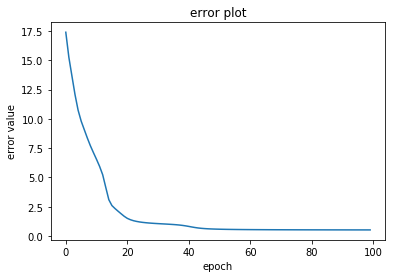

In [8]:
epoch = 100
err = np.zeros((epoch, 1))
inds = np.arange(0,x_train.shape[1],1)

for k in range(epoch):
    
    # init error
    err[k] = 0
    
    # random shuffle of data each epoch 
    inds = np.random.permutation(inds)
    for i in range(x_train.shape[1]):
        
        # random index
        inx = inds[i]
        
        # forward pass
        v = np.ones((2, 1))
        v[0] = np.dot(x_train[:28*28+1,inx],k1_w)
        v[1] = np.dot(x_train[:28*28+1,inx],k2_w)
        o = np.reshape(sigmoid(v),[1,2])
        
        # error
        err[k] = err[k] + np.sum(0.5 * (o - x_train[28*28+1:,inx]) ** 2)
        
        ## backprop <---
        
        # output layer
        delta_1 = (-1.0) * (x_train[28*28+1:,inx] - o)
        delta_2 = sigmoid(o, derive = True)
        
        # hidden layer
        delta_hw = np.reshape(x_train[:28*28+1,inx],[-1,1]) * delta_1 * delta_2
        
        # weights save up
        k1_w_tmp = k1_w_tmp + (-1.0) * eta * np.reshape(delta_hw[:,0],[28*28+1,1])
        k2_w_tmp = k2_w_tmp + + (-1.0) * eta * np.reshape(delta_hw[:,1],[28*28+1,1])
        
        # update rule
        if((k * x_train.shape[1] + i) % mini_batch == 0):
            k1_w = k1_w + k1_w_tmp / mini_batch
            k2_w = k2_w + k2_w_tmp / mini_batch
            k1_w_tmp = np.zeros_like(k1_w_tmp)
            k2_w_tmp = np.zeros_like(k2_w_tmp)
    
# plot it        
fig = plt.figure()
plt.plot(err)
plt.title('error plot')
plt.xlabel('epoch')
plt.ylabel('error value')
plt.show()
fig.savefig('part2.png', dpi=fig.dpi)

In [9]:
# Look at the training data
train_acc = 0
for i in range(x_train.shape[1]):

    # forward pass
    v = np.ones((2, 1))
    v[0] = np.dot(x_train[:28*28+1,i],k1_w)
    v[1] = np.dot(x_train[:28*28+1,i],k2_w)
    o = np.reshape(sigmoid(v),[1,2])
    oo = np.reshape(np.zeros([1,2]),[2,])
    oo[np.argmax(o)] = 1
    
    #print(str(i) + ": produced: " + str(o) + " wanted " + str(x_train[28*28+1:,i]))
    if(np.array_equal(x_train[28*28+1:,i],oo)):
        train_acc = train_acc + 1

print(str(train_acc) + ' out of ' + str(x_train.shape[1]) + ' in the training set was labeled correctly')
    

33 out of 34 in the training set was labeled correctly


In [10]:
# Look at the testing data
test_acc = 0
for i in range(x_test.shape[1]):

    # forward pass
    v = np.ones((2, 1))
    v[0] = np.dot(x_test[:28*28+1,i],k1_w)
    v[1] = np.dot(x_test[:28*28+1,i],k2_w)
    o = np.reshape(sigmoid(v),[1,2])
    
    oo = np.reshape(np.zeros([1,2]),[2,])
    oo[np.argmax(o)] = 1
    #print(str(i) + ": produced: " + str(oo) + " wanted " + str(x_test[28*28+1:,i]))
    if(np.array_equal(x_test[28*28+1:,i],oo)):
        test_acc = test_acc + 1

print(str(test_acc) + ' out of ' + str(x_test.shape[1]) + ' in the testing set was labeled correctly')
    

77 out of 100 in the testing set was labeled correctly


---